En este notebook se presenta la resolución de la Guía $2$ de la materia Introducción a Redes Complejas en Biología de Sistemas. Los enunciados se pueden revisar [aquí](https://drive.google.com/file/d/1plf9DaSbcC7t-kDiyCmzbtQv0o2JZjeW/view). 

# Ejercicio 1


### Inciso (a)
El vector k cuyos elementos son los grados ki de todos los nodos puede calcularse sumando $A_ij$ sobre j, con lo cual:
$$k_i = \sum_{j}^{n}A_{ij} = A \cdot \begin{bmatrix}1\\0\\0\\0\\\end{bmatrix}$$
Con lo cual el vector k buscado no es mas que:
$$k= A \cdot  \mathbf{1}$$


### Inciso (b)
La cantidad de enlaces L se puede calcular como la mitad de la sumatoria sobre ki. Veamos con un ejemplo como el vector k es $Diag\left (A^2\right )$
Sea A:

$$A =\begin{bmatrix}0&1&1&0\\1&0&1&1\\1&1&0&1\\0&1&1&0\\\end{bmatrix}  $$

Entonces $A^2$:

$$A \cdot A = \begin{bmatrix}0&1&1&0\\1&0&1&1\\1&1&0&1\\0&1&1&0\\\end{bmatrix} \cdot \begin{bmatrix}0&1&1&0\\1&0&1&1\\1&1&0&1\\0&1&1&0\\\end{bmatrix} = \begin{bmatrix}2&1&1&2\\1&3&2&1\\1&2&3&1\\2&1&1&2\\\end{bmatrix} $$

$$k = A \cdot \mathbf{1} = \begin{bmatrix}2&3&3&2\\\end{bmatrix} = Diag\left (A^2\right )$$

Entonces para calcular la cantidad de enlaces podemos hacer  simplemente $Tr\left (A^2\right )$ y dividirlo por los dos sentidos posibles:
$$\sum_{i}^{n}\frac{k_{i}}{2} = \frac{Tr\left (A^2\right )}{2}$$

### Inciso (c) 
Dada la propiedad de la matriz de adyacencia de que $$A^r_{ij}= \textrm{cantidad de caminos de largo r entre i y j}$$
Entonces la diagonal de $A^3$ contiene en la posicion i la cantidad de caminos de largo 3 (triangulos) que van de i a i (triangulos cerrados). Como cada traingulo involucra tres nodos y dos sentidos posibles (red no dirigida), la cantidad de triangulos  T es :

$$ T = \frac{ Tr\left (A^3\right )}{6}$$


### Inciso (d)
Queremos sumar los grados de los vecinos de i, para lo cual recordemos que $ A \cdot \mathbf{1}$ nos devuelve $k_i$:
$$  A \cdot \mathbf{1} = \begin{bmatrix}0&1&1&0\\1&0&1&1\\1&1&0&1\\0&1&1&0\\\end{bmatrix} \cdot \begin{bmatrix}1\\1\\1\\1\\\end{bmatrix} = \begin{bmatrix}2&3&3&2\\\end{bmatrix} $$

De ese vector, para $k_{nn}^{i}$ queremos unicamente sumar los grados de los que son vecinos de i. Por ejemplo para i=1 queremos sumar unicamente los grados $k_2$ y $k_3$, que es lo equivalente a hacer:
$$  A \cdot \mathbf{1} \cdot \begin{bmatrix}0\\1\\1\\0\\\end{bmatrix}= \begin{bmatrix}2&3&3&2\\\end{bmatrix} \cdot \begin{bmatrix}0\\1\\1\\0\\\end{bmatrix} = 3+3=6$$

Es decir, que multiplicando $ A \cdot \mathbf{1}$ por el vector $A_i$ obtenemos $k_{nn}^{i}$, o lo que es lo mismo:
$$k_{nn}= \begin{bmatrix}2&3&3&2\\\end{bmatrix}\cdot \begin{bmatrix}0&1&1&0\\1&0&1&1\\1&1&0&1\\0&1&1&0\\\end{bmatrix} =  A \cdot \mathbf{1} \cdot A$$

# Ejercicio 2

![ej2](img/Guia_2_ej_2.png)

### Inciso (a)

In [35]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

#matriz de adyacencia (a)
ady_a = np.matrix([
         [0,1,1,1,0,1],
         [1,0,1,1,0,0],
         [1,1,0,0,0,1],
         [1,1,0,0,0,0],
         [0,0,0,0,0,0],
         [1,0,1,0,0,0]])

#matriz de adyacencia (b)
ady_b = np.matrix([
                     [0,0,1,1,0,1],
                     [1,0,1,0,0,0],
                     [0,1,0,0,0,1],
                     [0,1,0,0,0,0],
                     [0,0,0,0,0,0],
                     [0,0,0,0,0,0]])

#creo los grafos a partir de las matrices de adyacencia
Graf_a = nx.from_numpy_matrix(ady_a)
Graf_b = nx.from_numpy_matrix(ady_b,create_using=nx.MultiDiGraph())

#mapeo las permutaciones, considerando que networkx empieza desde el cero
mapping = {4:5, 5:4} 
Graf_a_permutada = nx.relabel_nodes(Graf_a, mapping)
Graf_b_permutada = nx.relabel_nodes(Graf_b, mapping)

#matriz de adyacencia permutada (a)
ady_a_permutada = nx.to_numpy_matrix(Graf_a_permutada, nodelist = sorted(Graf_a_permutada))
print(f'Matriz adyacencia de la red a: \n {ady_a}')
print(f'Matriz permutada de la red a: \n {ady_a_permutada} \n')

#matriz de adyacencia permutada (a)
ady_b_permutada = nx.to_numpy_matrix(Graf_b_permutada, nodelist = sorted(Graf_b_permutada))
print(f'Matriz adyacencia de la red b: \n {ady_b}')
print(f'Matriz permutada de la red b: \n {ady_b_permutada}')

Matriz adyacencia de la red a: 
 [[0 1 1 1 0 1]
 [1 0 1 1 0 0]
 [1 1 0 0 0 1]
 [1 1 0 0 0 0]
 [0 0 0 0 0 0]
 [1 0 1 0 0 0]]
Matriz permutada de la red a: 
 [[0. 1. 1. 1. 1. 0.]
 [1. 0. 1. 1. 0. 0.]
 [1. 1. 0. 0. 1. 0.]
 [1. 1. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]] 

Matriz adyacencia de la red b: 
 [[0 0 1 1 0 1]
 [1 0 1 0 0 0]
 [0 1 0 0 0 1]
 [0 1 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]
Matriz permutada de la red b: 
 [[0. 0. 1. 1. 1. 0.]
 [1. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


Al intercambiar las etiquetas de los nodos se intercambian filas por columnas de los nodos reetiquetados. 


### Inciso (b)

In [4]:
#busco el coeficiente de clustering medio
clust_medio_a = nx.average_clustering(Graf_a)
print(f'El coeficiente de Clustering medio es {round(clust_medio_a,2)}')

El coeficiente de Clustering medio es 0.64


### Inciso (c)

In [36]:
#busco los posibles caminos simples entre el nodo 1 y 3 (0 y 2 para la nomeclatura que utilizo)

caminos = []
for camino in nx.all_simple_paths(Graf_a, source=0, target=2):
    if (len(camino) == 3) :
        caminos.append(camino)
        
print(f'Los caminos posibles son {len(caminos)}: \n {caminos} ' )

Los caminos posibles son 2: 
 [[0, 1, 2], [0, 5, 2]] 


### Inciso (d)

Networkx no tiene un algoritmo que cuente los ciclos en redes no dirigidas. El algoritmo que tiene es uno que te genera las bases de los ciclos. Asi que sacamos la idea del algoritmo de libro de Chai Lee$^{[1]}$ donde plantea el uso de combinaciones lineales desusodichas bases.

[1]ALGORITHMIC APPROACHES TO CIRCUIT ENUMERATION PROBLEMS AND APPLICATIONS by BOON CHAI LEE (1978) page 52 http://dspace.mit.edu/bitstream/handle/1721.1/68106/FTL_R_1982_07.pdf

In [38]:
list(nx.find_cycle(Graf_a, orientation='ignore'))

[(0, 1, 'forward'), (1, 2, 'forward'), (2, 0, 'forward')]

In [43]:
import itertools

#busco los ciclos de longitud 4 de la red a
ciclos_a =[]
bases_ciclos_a = nx.cycle_basis(Graf_a)
print(f'Bases de los ciclos: {bases_ciclos_a}')

#me fijo si las combinaciones lineales de las bases pertenecen al grafo:   
for i in range(1,len(bases_ciclos_a) + 1):
    for n in itertools.combinations(bases_ciclos_a, i):
        ciclo = list(dict.fromkeys(np.concatenate(n))) #me deja la lista de nodos limpia sin repeticiones
       
        #chequeo que tenga longitud 4:
        if len(ciclo) == 4:
            
            #chequeo si la combinacion pertenee al conjunto de caminos: 
            #esto lo que hace era chequear si todos los nodos del ciclo estan enlazados pero no es necesariamente cierto
            if all(Graf_a.has_edge(enlace[0],enlace[1]) == False for enlace in list(itertools.combinations(ciclo, 2))) == False:
                ciclos_a.append(ciclo)
            
            
            #esto es falso porque no todas las combinaciones estan unidas si es un ciclo. lo que hice antes fue 
            #fijarme si para todas las permutaciones del string de un ciclo habia un camino posible. pero esto no es
            # necesariemente cierto porque tal vez ese camino posible no es cerrado



print(f'Ciclos: {ciclos_a}')

Bases de los ciclos: [[2, 5, 0], [1, 3, 0], [1, 2, 0]]
Ciclos: [[2, 5, 0, 1], [1, 3, 0, 2]]


In [44]:
#para las redes dirigidas (en nuestrp caso, b) networkx tiene un algoritmo armado
ciclos_b = []
for ciclo in nx.simple_cycles(Graf_b):
    if len(ciclo) == 4 :
        ciclos_b.append(ciclo)

print(f'La cantidad de ciclos de longitud 4 de la red a es {len(ciclos_a)}')
print(f'La cantidad de ciclos de longitud 4 de la red b es {len(ciclos_b)}')

La cantidad de ciclos de longitud 4 de la red a es 2
La cantidad de ciclos de longitud 4 de la red b es 0


# Ejercicio 3 

![ej3](img/Guia_2_ej_3.png)

Para pasar de matrices calculadas en python a latex y verlas mejor pasamos arrays a latex con la siguiente función.

In [1]:
#crea matriz de latex a partir de matrices de numpy
import array_to_latex as a2l
to_tex = lambda A : a2l.to_ltx(A, frmt = '{:6.0f}', arraytype = 'array', mathform=True)

In [6]:
#* La matriz de adyacencia de la red (a)
import numpy as np
A_ady = np.matrix([[0 , 1 , 0 , 0 , 1], 
    [0 , 0 , 1 , 0 , 0],
    [1 , 0 , 0 , 0 , 1],
    [0 , 1 , 1 , 0 , 0],
    [0 , 0 , 0 , 0 , 0]])

Se define coeficiente de cocitación entre nodos $i$ y $j$ como el número de nodos que tienen enlaces que apuntan a nodos $i$ y $j$ al mismo tiempo. Se puede escribir como $C = A A^t$

In [7]:
#La matriz de co-citas de la red (a)
A_ady_t = np.transpose(A_ady)
A_co = A_ady * A_ady_t

La matriz de incidencia de un grafo cumple con los siguientes requisitos:
* Las columnas de la matriz representan las aristas del grafo.
* Las filas representan a los distintos nodos.
* Por cada nodo unido por una arista, ponemos un uno (1) en el lugar correspondiente, y llenamos el resto de las ubicaciones con ceros (0).

In [8]:
#La matriz de incidencia de la red (b)
B_ind = np.matrix(
    # 1 2 3 4 5 
   # 1 
    [[1 , 0 , 1 , 0 , 0], 
    # 2
     [0 , 1 , 1 , 0 , 0],
    #3
     [0 , 0 , 0 , 1 , 0],
    #4
     [0 , 1 , 1 , 1 , 1]])

Una red bipartita se puede proyectar para cualquiera de sus dos conjuntos. Según el criterio con el que se defina la matriz de incidencia, la proyección será $ I I^t$ o $I^t I$.

In [9]:
#La matriz proyección de la red (b) en los vértices oscuros.
B_ind_t = np.transpose(B_ind)
B_proy_oscura = B_ind_t * B_ind

* La matriz de adyacencia de la red (a):


$$ A_{ady} = 
\begin{array}{c}
\begin{matrix}
1 & 2 & 3 & 4 & 5
\end{matrix} \\
\left(\ \begin{matrix}
0 & 1 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 & 0\\
1 & 0 & 0 & 0 & 1\\
0 & 1 & 1 & 0 & 0\\
0 & 0 & 0 & 0 & 0
\end{matrix}\ \right)
\end{array}
$$

* La matriz de co-citas de la red (a):

$$A_{co} = 
\begin{array}{c}
\begin{matrix}
1 & 2 & 3 & 4 & 5
\end{matrix} \\
\left(\ \begin{matrix}
       2  &       0  &       1  &       1  &       0 \\
       0  &       1  &       0  &       1  &       0 \\
       1  &       0  &       2  &       0  &       0 \\
       1  &       1  &       0  &       2  &       0 \\
       0  &       0  &       0  &       0  &       0 
\end{matrix}\ \right)
\end{array}
$$

La matriz de incidencia de la red (b): 

$$B_{ind} = 
\begin{array}{c}
\begin{matrix}
1 & 2 & 3 & 4 & 5
\end{matrix} \\
\left(\ \begin{matrix}
       1  &       0  &       1  &       0  &       0 \\
       0  &       1  &       1  &       0  &       0 \\
       0  &       0  &       0  &       1  &       0 \\
       0  &       1  &       1  &       1  &       1 
\end{matrix}\ \right)
\end{array}
$$

La matriz de proyección en los vértices oscuros de la red (b) es:

$$B_{proy} =  
\begin{array}{c}
\begin{matrix}
1 & 2 & 3 & 4 & 5
\end{matrix} \\
\left(\ \begin{matrix}
       1  &       0  &       1  &       0  &       0 \\
       0  &       1  &       1  &       0  &       0 \\
       0  &       0  &       0  &       1  &       0 \\
       0  &       1  &       1  &       1  &       1 
\end{matrix}\ \right)
\end{array}
$$


# Ejercicio 4

![ej4](img/Guia_2_ej_4.png)

### Inciso (a)
La matriz de adyacencia que corresponde a la red es la siguiente:
$$A = 
\begin{array}{c}
\begin{array}
\\1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9 & 10 & 11\\
\end{array} \\
\left(\ \begin{array}{@{}cccccc|ccccc@{}}
0&	0&	0&	0&	0&	0&	1&	0&	0&	0&	0\\
0&	0&	0&	0&	0&	0&	0&	0&	1&	0&	0\\
0&	0&	0&	0&	0&	0&	1&	1&	1&	0&	0\\
0&	0&	0&	0&	0&	0&	0&	0&	1&	1&	0\\
0&	0&	0&	0&	0&	0&	0&	0&	1&	0&	1\\
0&	0&	0&	0&	0&	0&	0&	0&	0&	0&	1\\\hline
1&	0&	1&	0&	0&	0&	0&	0&	0&	0&	0\\
0&	0&	1&	0&	0&	0&	0&	0&	0&	0&	0\\
0&	1&	1&	1&	1&	0&	0&	0&	0&	0&	0\\
0&	0&	0&	1&	0&	0&	0&	0&	0&	0&	0\\
0&	0&	0&	0&	1&	1&	0&	0&	0&	0&	0\\
\end{array}\ \right)
\end{array}
$$

Esta separada en bloques dado hay dos grupos marcados que no interactuan entre si: {1,2,3,4,5,6} y {7,8,9,10,11}

### Inciso (b)
Las dos posibles proyecciones de esa red se dan segun a que grupo de nodos consideramos como afiliados y a cual como afiliaciones.

#### Opción 1: 
Afiliados: {1-6} Afiliaciones: {7-11}
$$ \begin{array}{c}
\begin{array}\\
1 & 2 & 3 & 4 & 5 & 6\\
\end{array} \\
\left(\ \begin{array}\\
0&	0&	1&	0&	0&	0\\
0&	0&	1&	1&	1&	0\\
1&	1&	0&	1&	1&	0\\
0&	1&	1&	0&	1&	0\\
0&	1&	1&	1&	0&	1\\
0&	0&	0&	0&	1&	0\\
\end{array}\ \right)
\end{array}$$
#### Opción 2: 
Afiliados: {7-11} Afiliaciones: {1-6}
$$ \begin{array}{c}
\begin{array}\\
7&8&9&10&11\\
\end{array} \\
\left(\ \begin{array}\\
0&	1&	1&	0&	0\\
1&	0&	1&	0&	0\\
1&	1&	0&	1&	1\\
0&	0&	1&	0&	0\\
0&	0&	1&	0&	0\\
\end{array}\ \right)
\end{array}$$

### Inciso (c)
El grado medio para cada tipo de nodo es el siguiente:

In [28]:
import numpy as np
A= np.matrix([
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
[0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0]]
)

k=np.diagonal(A*A)
print(f'k={k}')

k=[1 1 3 2 2 1 2 1 4 1 2]


In [27]:
print(f'El grado medio de los nodos 1-6 es {np.mean(k[:6])}')
print(f'El grado medio de los nodos 7-11 es {np.mean(k[6:])}')

El grado medio de los nodos 1-6 es 1.6666666666666667
El grado medio de los nodos 7-11 es 2.0


### Inciso (d)
El grado medio en las dos redes proyectadas es la siguiente:

In [34]:
A_proyeccion1=np.matrix([
[0, 0, 1, 0, 0, 0],
[0, 0, 1, 1, 1, 0],
[1, 1, 0, 1, 1, 0],
[0, 1, 1, 0, 1, 0],
[0, 1, 1, 1, 0, 1],
[0, 0, 0, 0, 1, 0]])
A_proyeccion2=np.matrix([
[0, 1, 1, 0, 0],
[1, 0, 1, 0, 0],
[1, 1, 0, 1, 1],
[0, 0, 1, 0, 0],
[0, 0, 1, 0, 0]])

k_1=np.diagonal(A_proyeccion1*A_proyeccion1)
k_2=np.diagonal(A_proyeccion2*A_proyeccion2)
print(f'k1={k_1}')
print(f'k2={k_2}')
print(f'Afiliados: 1-6, Afiliaciones: 7-11 => <k>={np.mean(k_1)}')
print(f'Afiliados: 7-11, Afiliaciones: 1-6 => <k>={np.mean(k_2)}')

k1=[1 3 4 3 4 1]
k2=[2 2 4 1 1]
Afiliados: 1-6, Afiliaciones: 7-11 => <k>=2.6666666666666665
Afiliados: 7-11, Afiliaciones: 1-6 => <k>=2.0


# Ejercicio 5 

### Inciso (a)

El número de enlaces máximo será $N_1 * N_2$. Ya que todos los nodos $N_1$ se pueden enlazar con todos los nodos $N_2$, pero no entre sí debido a la naturaleza de la red.

In [60]:
#Lmax es la maxima cantidad de enlaces que puede tener una red bipartita

def Lmax_bipartita(N1,N2):
    N2 = N2 + N1
    numero_enlaces = 0
    enlaces = []
    for n1 in range(N1):
        for n2 in range(N1,N2):
            enlaces.append((n1,n2))
            numero_enlaces += 1
    return numero_enlaces, enlaces

#ejemplo:
Lmax_bipartita(10, 20)[0]

200

### Inciso (b)

En una red de $N$ nodos monopartita puedo realizar $\frac{N (N-1)}{2}$ enlances considerando que un nodo no puede enlazarse consigo mismo y que estamos contando los enlaces dos veces (enlace $3-4$ es el mismo que $4-3$ en una red no dirigida).

Entonces tenemos $\frac{(N_1 + N_2) (N_1 + N_2 - 1)}{2} - N_1 N_2$

In [62]:
def Lmax_monopartita(N1,N2):
    N = N1 + N2
    enlaces = list(itertools.combinations(np.arange(N), 2))
    numero_enlaces = len(enlaces)
    return numero_enlaces, enlaces
                         

def diferencia_enlaces(N1,N2):
    Lmax_monopartita(N1,N2)[0]
    diferencia =  Lmax_monopartita(N1,N2)[0] - Lmax_bipartita(N1,N2)[0]
    return diferencia

#Ejemplo numerico
diferencia_enlaces(10, 20)

235

### Inciso (c)

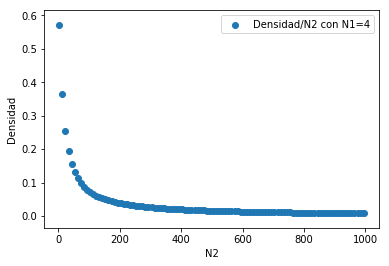

In [63]:
from networkx.algorithms import bipartite

i=4
densidades = []
lista_N2 = []
while i<= 1000:
    Red_i = nx.Graph()
    Red_i.add_edges_from(Lmax_bipartita(4,i)[1])
    densidad = nx.density(Red_i)
    
    densidades.append(densidad)
    lista_N2.append(i)
    i+=10


    
plt.figure()
plt.scatter(lista_N2,densidades,label="Densidad/N2 con N1=4")
plt.xlabel("N2")
plt.ylabel("Densidad")
plt.legend()

Como se puede observar en el gráfico, la densidad decrece exponencialmente a medida que N2 crece con respecto a N1.
Este resultado tiene sentido ya que la matriz de adyacencia de una red bipartita tiene la forma $\Re^{(n+m) \times (n+m)}$ donde $\Re^{(n) \times (n)}$ y $\Re^{(m) \times (m)}$ son matrices de ceros acomodadas segun el Ejercicio 4 (a).

### Inciso (d)

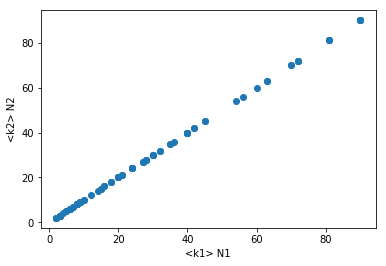

In [68]:
import random
import collections

i=4
k1_medio = []
k2_medio = []
N1_list = []
N2_list = []
while i<= 1000:
    #genero N1 y N2 random entre 1 y 100
    N1 = random.randint(1,10)
    N2 = random.randint(1,10)
    #print(N1,N2)
    
    #creo la red bipartita
    Red_i = nx.Graph()

    Red_i.add_nodes_from(np.arange(N1), bipartite=0)
    Red_i.add_nodes_from(np.arange(N1,N1+N2), bipartite=1)
    Red_i.add_edges_from(Lmax_bipartita(N1,N2)[1])
    
    n1, n2 = bipartite.sets(Red_i)
    k1,k2 = bipartite.degrees(Red_i,n2)
    
    #busco la media de los grados de cada set
    k1_m = np.mean(np.array([i[1] for i in k1]))
    k2_m = np.mean(np.array([i[1] for i in k2]))

    k1_medio.append(k1_m)
    k2_medio.append(k2_m)
    N1_list.append(N1)
    N2_list.append(N2)
    
    
    #print(k1)
    #print(k2)
    i+=10 
    
x = np.array(k1_medio)*np.array(N1_list)
y = np.array(k2_medio)*np.array(N2_list)
plt.figure()
plt.scatter(x,y)
plt.xlabel("<k1> N1")
plt.ylabel("<k2> N2")
plt.show()

Esto ocurre ya que en una red bipartita la cantidad de enlaces maximo va a estar dada por el limite que impone el conjunto opuesto: la cantidad de enlaces por nodo va a ser exactamente el numero de nodos del otro conjunto.
Entonces se va a cumplir que $\langle k_{1}\rangle N_{1}= \langle k_{2} \rangle N_{2}$

# Ejercicio 6

Consideramos el conjunto de todos los caminos entre el nodo-i y el nodo-j en un grafo no dirigido de
matriz de adyacencia A. Los caminos de largo r se representan por la matriz $A^{r}$. Queremos ver que la suma de los pesos de todos los caminos que conectan el nodo-i con el nodo-j también está dada por $Z_{ij}$, el elemento $ij$ de la matriz $Z = (I − \alpha A)^{−1}$ *(1)*. 

#### a)
Tenemos que $A^{r}$ son los caminos de largo r. La suma de todos los caminos la definimos como $Z = \sum_{r=0}^{\infty} \alpha^{r} A^{r}$ y queremos demostrar la igualdad con *(1)*. 
Multiplicamos de ambos lados por $(I − \alpha A)$ con lo cual nos queda:

$Z(I − \alpha A) = \sum_{r=0}^{\infty} \alpha^{r} A^{r} (I − \alpha A) = I
$

Distribuimos 

$\sum_{r=0}^{\infty} \alpha^{r} A^{r}  − \sum_{r=0}^{\infty} \alpha^{r+1} A^{r+1} = I$

Arreglamos los límites de la sumatoria para tener iguales exponentes:

$\sum_{r=0}^{\infty} \alpha^{r} A^{r}  − \sum_{r=1}^{\infty} \alpha^{r+1} A^{r+1} = I$

Eso nos deja sólo el término con $r = 0$:

$\alpha^{0} A^{0} = I$

$1 I = I$

Con eso probamos la igualdad de ambas representaciones de Z. 

#### b)
La sumatoria es infinita, podría diverger. Es una suma geométrica por lo cual $\left| \alpha \right| \left|\left|A \right|\right| < 1$. Por ende necesita una restricción al valor de $\alpha$ para que converja. Mientras que $\alpha < \frac{1}{\left|\left|A \right|\right|}$ los caminos más largos tendran menos peso  que los más cortos. Esto se debe a que un número menor a uno elevado a números positivos va dando más chico para cada término de la sumatoria. Tiene sentido ya que estamos diciendo que los vértices que están más conectados lo hacen por caminos más cortos.

#### c)

Como $A_{ij}^{r}$ es la cantidad de caminos de i a j de largo $r$, necesitamos para ver la distancia más corta el menor $r$ para el cual el elemento es distinto de cero. Ejemplo: si los nodos i y j están conectados directamente la matriz $A$ tendrá un $1$ en la posición $(ij)$. Si otros dos nodos están a dos de distancia, $A_{ij} \neq 1$, pero $A_{ij}^{2} \geq 1$ . Por ende, necesitamos el menor $r$ para el cual $Z_{ij} \neq 0$, ese $r$ es la distancia geodésica entre dos nodos.


$Z_{ij}(r) = \sum_{r=0}^{\infty} \alpha^{r} (A^{r})_{ij}$

Tomo $log(\alpha) = z$, entonces $\alpha = e^z$

$\begin{split}
 \frac{d \ log Z_{ij}}{d \log \alpha} & = \frac{d}{dz} \left( log \sum_{r=0}^{\infty} e^{zr} (A^r)_{ij} \right) \\ 
 & = \frac{\sum_{r=0}^{\infty} \frac{d}{dz} e^{zr} (A^r)_{ij}}{\sum_{r=0}^{\infty} e^{zr} (A^r)_{ij}} \\
& = \frac{\sum_{r=0}^{\infty} e^{zr} r (A^r)_{ij}}{\sum_{r=0}^{\infty} e^{zr} (A^r)_{ij}} \\
& = \frac{\sum_{r=0}^{\infty} \alpha^{r} r (A^r)_{ij}}{\sum_{r=0}^{\infty} \alpha^{r} (A^r)_{ij}}
\end{split}$

$(A^r)_{ij} = 0$ para todo $r < r_{min}$ con $r_{min}$ la distancia geodésica entre los nodos $i$ y $j$. 

$\frac{d \ logZ_{ij}}{d \log \alpha} = \frac{\sum_{r=r_{min}}^{\infty} \alpha^{r} r (A^r)_{ij}}{\sum_{r=r_{min}}^{\infty} \alpha^{r} (A^r)_{ij}}$



Si tomamos $\alpha \rightarrow 0$ y tachamos, nos queda:

$\lim_{\alpha\to\ 0}\frac{d \ logZ_{ij}}{d \log \alpha} = r_{min} \equiv l_{ij}$

# Ejercicio 7
La diferencia entre un 2-componente y un 2-core es que un 2-componente da informacion sobre el numero de caminos independientes, mientras que un 2-core da informacion de la cantidad de enlaces en el conjunto. Una interpretacion posible es que un k-core tiene $min(k_i) = k$  dentro del conjunto.

Es decir, los k-core limitan el grado minimo mientras que los k-componentes limitan la existencia de los puentes locales.

Tomemos los siguientes ejemplos para explicarlo graficamente:

In [51]:
import networkx as nx
import matplotlib.pyplot as plt 
import array_to_latex as a2l

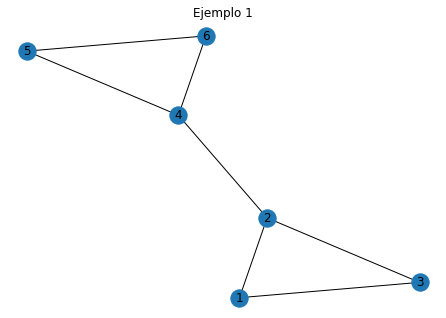

In [57]:
Red1= nx.Graph() 
edges1=[(1,2),(1,3),(2,3),(2,4),(4,5),(4,6),(4,5),(5,6)]
Red1.add_edges_from(edges1)
nx.draw(Red1, with_labels=True)
plt.title("Ejemplo 1")
plt.show()

En este primer ejemplo podemos observar que este grafo es 2-core ya que todos los nodos conectan con al menos otros 2 nodos del conjunto, pero no 2-componente ya que no hay dos caminos indepedientes entre, por ejemplo, los nodos 1 y 6.

$$k= Diag\left(A^2\right)= [2, 3, 2, 3, 2, 2] $$

A su vez, los conjuntos de nodos {1,2,3} y {4,5,6} forman cada uno un 2-componente. Es decir que esta red tiene un unico 2-core y dos 2-componentes.

En cambio si ahora conectamos los nodos 3 y 6:

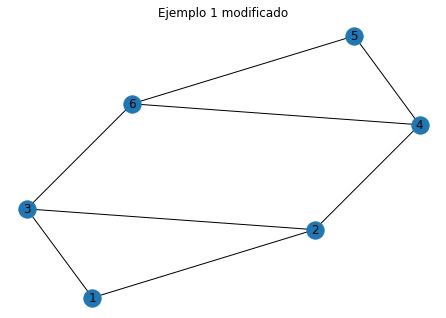

In [58]:
Red1.add_edges_from([(3,6)])
nx.draw(Red1, with_labels=True)
plt.title("Ejemplo 2")
plt.show()

$$k= Diag\left(A^2\right)= [2, 3, 3, 3, 2, 3] $$
El grafo sigue siendo un 2-core pero ahora tambien es un 2-componente ya que cada par de nodos tiene dos caminos independientes. Con lo cual conseguimos modificar el grafo con un solo enlace para que tenga un unico 2-componente y un unico 2-core.

Es decir, un 2-componente tiene que ser minimamente un 2-core pero no necesariamente a la inversa.

# Ejercicio 8

### Inciso (a)

Se considera el nivel trófico, $x_i$, de una especie en una red trófica (que es una red dirigida), como el valor medio de los niveles tróficos de sus presas, más uno. Es decir, los nodos que apuntan al nodo $i$ más uno.

Los nodos que apuntan al nodo $i$ los calculamos tomando la multiplicación entre $x_j$ (un vector que tiene los valores tróficos) y $A$ (la matriz de adyacencia). Esto nos asegura que se estarán considerando los niveles tróficos que van de $j$ a $i$ ($j$ va desde $1$ hasta el nodo n-ésimo). Para tomar el valor medio dividimos este valor por el total de enlaces que le entran al nodo (la componente $ii$ de $D$, matriz diagonal de in-degrees). Luego le sumamos $1$ por definición.

$\begin{split}
x_i &= \frac{\sum_{j=1}^{N} A_{ij} x_j}{D_{ii}} + 1 \\
& = \frac{\sum_{j=1}^{N} A_{ij} x_j + D_{ii}}{D_{ii}} 
\end{split}$

$D_{ii} \ x_i = \sum_{j=1}^{N} A_{ij} x_j + D_{ii}$

Esto lo podemos reescribir como: 

$\begin{align*}
(D \ x)_i &= (A \ x + D \ \mathbb{1})_i\\
D \ x - A \ x &= D \ \mathbb{1}\\
(D - A) \ x &= D \ \mathbb{1} \\
x &= (D - A)^{-1} D \ \mathbb{1}
\end{align*}$

### Inciso (b)

El cálculo anterior diverge para especies que no poseen predadores, ya que eso se representa como un $0$ en $D_{ii}$. Se podría tomar $D + \mathbb{1}$ o de manera equivalente $D_{ii} + 1$ para asegurarse de que cada especie tenga al menos $1$ "presa".

# Ejercicio 9

O como nos gusta llamarlo...

<table><tr>
<td> <img src="img/meme_guia_02.jpg" alt="Drawing" style="width: 500px;"/> </td>
<td> <img src="img/Guia_2_ej_9_rta.svg" alt="Drawing" style="width: 800px;"/> </td>
</tr></table>

El tamaño del conjunto de vértices de corte minimal entre los nodos $s$ y $t$ es $k = 3$. En gris se seleccionó una elección particular de los nodos. De colores se observan los $k$ caminos independientes.Los nodos a elegir entonces deben pertenecer uno a cada camino, como mínimo, de manera de separar por completo a $s$ y $t$. 